In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk        
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/jagri/Downloads/archive (11).zip")
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [14]:
df.drop(columns='Unnamed: 0',inplace = True)

In [15]:
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [4]:
print('--> There are',df.shape[0],'rows and',df.shape[1],'columns')
print('\n===========================================================\n')
print('--> Missing Values:\n\n',df.isna().sum())
print('\n===========================================================\n')
print('Product Counts:\n\n',df['product'].value_counts())

--> There are 162421 rows and 3 columns


--> Missing Values:

 Unnamed: 0     0
product        0
narrative     10
dtype: int64


Product Counts:

 credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64


In [5]:
## preprocessing 
df.dropna(axis=0,inplace=True) # drop na values
data = df[['product','narrative']].sample(n=10000) #sampling 

stopwords = nltk.corpus.stopwords.words('english')
def text_clean(text):
    """
    The function performs following tasks:
    1. Lower text
    2. Remove digits
    3. Dropping words with less than 3 character
    4. Remove white space
    5. Remove Stopwords
    """
    clean_words = []
    
    word_list = text.split() #Convert to list
    for word in word_list:
        word_l = word.lower().strip()
        if word_l.isalpha():
            if len(word_l) > 3:
                if word_l not in stopwords :
                    clean_words.append(word_l)
                else:
                    continue
    return clean_words 
tfidf = TfidfVectorizer(analyzer=text_clean)
x_tfidf = tfidf.fit_transform(data['narrative'])

In [6]:
x_tfidf.shape

(10000, 12922)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, data['product'], test_size=0.2, random_state=42)

In [8]:
# trainning model 
rfc = RandomForestClassifier(n_jobs=-1)
rfc_model = rfc.fit(X_train,y_train)

In [9]:
prediction = rfc_model.predict(X_test)

In [10]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,prediction))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,prediction))

Confusion Matrix:

 [[ 104   66    2    3   23]
 [   3 1104   10    7    2]
 [   6  138  130   14    3]
 [   2   59    2  162    3]
 [   6   20    0    3  128]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.86      0.53      0.65       198
   credit_reporting       0.80      0.98      0.88      1126
    debt_collection       0.90      0.45      0.60       291
mortgages_and_loans       0.86      0.71      0.78       228
     retail_banking       0.81      0.82      0.81       157

           accuracy                           0.81      2000
          macro avg       0.84      0.70      0.74      2000
       weighted avg       0.83      0.81      0.80      2000



<Figure size 1000x1000 with 0 Axes>

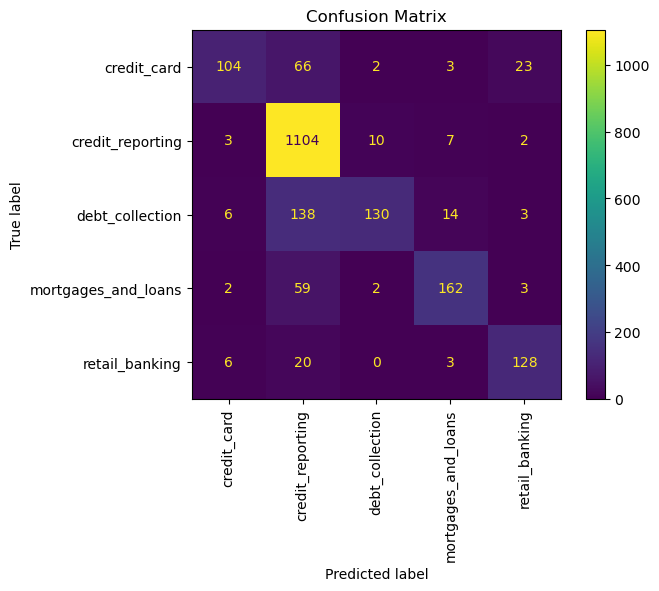

In [11]:
class_names = ['credit_card','credit_reporting','debt_collection','mortgages_and_loans','retail_banking']
plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,prediction),display_labels=class_names)
disp.plot()  
plt.xticks(rotation=90)
plt.title("Confusion Matrix")
plt.show()


In [18]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock

# Function to calculate distances and similarities
def calculate_metrics(data):
    num_rows = data.shape[0]
    metrics = {'cosine_similarity': [], 'euclidean_distance': [], 'manhattan_distance': []}
    
    for i in range(num_rows):
        for j in range(i + 1, num_rows):
            row_i = df.iloc[i]
            row_j = df.iloc[j]
            
            cosine_sim = 1 - cosine(row_i, row_j)
            eucl_dist = euclidean(row_i, row_j)
            manh_dist = cityblock(row_i, row_j)
            
            metrics['cosine_similarity'].append((i, j, cosine_sim))
            metrics['euclidean_distance'].append((i, j, eucl_dist))
            metrics['manhattan_distance'].append((i, j, manh_dist))
    
    return metrics

# Calculate metrics
results = calculate_metrics(data)

# Print results
print("Cosine Similarity:")
for res in results['cosine_similarity']:
    print(f"Between rows {res[0]} and {res[1]}: {res[2]}")

print("\nEuclidean Distance:")
for res in results['euclidean_distance']:
    print(f"Between rows {res[0]} and {res[1]}: {res[2]}")

print("\nManhattan Distance:")
for res in results['manhattan_distance']:
    print(f"Between rows {res[0]} and {res[1]}: {res[2]}")


TypeError: can't multiply sequence by non-int of type 'str'